In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# # !pip install neattext 

In [ ]:
# from google.colab import drive
#  drive.mount('/content/drive')

In [ ]:
# Load Data Viz Pkgs
import seaborn as sns

In [ ]:
# Load Text Cleaning Pkgs
!pip install neattext
import neattext as nfx

     |████████████████████████████████| 114 kB 4.9 MB/s 


In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/emoji/tweet_emotions.csv')

In [ ]:
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [ ]:
# Value Counts
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

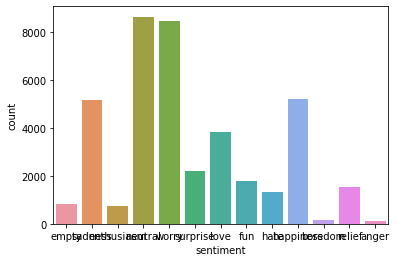

In [ ]:
# Plot
sns.countplot(x='sentiment',data=df)

In [ ]:
# Data Cleaning
dir(nfx)


['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [ ]:
# User handles
df['Clean_Text'] = df['content'].apply(nfx.remove_userhandles)
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
# Hashtags
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_hashtags)
# Punctuatuins
# df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)


In [ ]:
df

,tweet_id,sentiment,content,Clean_Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"want trade Houston tickets, will."
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...


In [ ]:
# Features & Labels 
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from  sklearn.pipeline import Pipeline

In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[(  'cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
# Train and Fit Data 
pipe_lr.fit(x_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
# Check Accuracy
print("Score",pipe_lr.score(x_test,y_test))


Score 0.33525


In [ ]:
# Make A Prediction
ex1 = "you broke my heart"
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.00153412, 0.00081951, 0.00441262, 0.00663194, 0.00954369,
        0.00802576, 0.01381272, 0.0388941 , 0.04532704, 0.01672267,
        0.4938794 , 0.03634355, 0.32405288]])

In [ ]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [ ]:
# Save Model & Pipeline
import joblib
# pipeline_file = open("emotion.pkl","wb")
# joblib.dump(pipe_lr,pipeline_file)
# pipeline_file.close()

In [ ]:
txt=pd.read_csv('/content/drive/MyDrive/emoji/emoji.csv')

In [ ]:
txt=txt.iloc[:,0:14]


In [ ]:
txt

,Emoji,Empty,sadness,Enthusiasm,Neutral,worry,Surprise,Love,Fun,Happiness,hate,Relief,boredom,anger
0,😃,0.0,0.0,0.2,0.0,0.0,0.1,0.0,0.8,1.0,0.0,0.6,0.0,0
1,🙂,0.2,0.1,0.0,0.4,0.0,0.0,0.0,0.5,0.5,0.0,0.1,0.0,0
2,😁,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.7,0.9,0.0,0.2,0.0,0
3,😆,0.0,0.0,1.0,0.0,0.0,0.2,0.4,0.9,1.0,0.0,0.0,0.0,0
4,😅,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.4,0.4,0.0,0.0,0.0,0
5,🤣,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.3,0.0,0
6,😂,0.0,0.0,0.7,0.0,0.0,0.2,0.6,0.7,0.8,0.0,0.0,0.0,0
7,😊,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.7,0.0,0.4,0.0,0
8,🥰,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3,0.7,0.0,0.0,0.0,0
9,😍,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
import csv 

with open('/content/drive/MyDrive/Colab Notebooks/recommend.csv','w') as f:
      writer=csv.writer(f)
      t=txt.columns
      n=txt.shape[1]
      m=txt.shape[0]
      data=[]
      maxi=0
      for i in range(1,n):
        g=0
        for j in range(m):
           if txt.iloc[j,i]>0:
              g=g+1
        maxi=max(maxi,g)
      
      for i in range(maxi+1):
        data.append(i)
      writer.writerow(data)
            
      for i in range(1,n):
        y=[]
        y.append(t[i])
        for j in range(m):
           if txt.iloc[j,i]>0:
              
              y.append(txt.iloc[j,0])
        print(y)
        writer.writerow(y)
f.close()


['Empty', '🙂', '😕', '😔', '🤕']
['sadness', '🙂', '😕', '😟', '😔', '😲', '😧', '😞', '😣', '😪', '😴', '\U0001f971', '🤒', '🤕', '🤮', '🥴', '🤧', '😤', '👿', '😠']
['Enthusiasm', '😃', '😁', '😆', '🤣', '😂', '🤩', '😛', '😝', '\u200d🤗']
['Neutral', '🙂', '😔', '😞']
['worry', '😅', '😕', '😟', '😔', '😲', '😧', '😞', '😣', '😪', '😴', '\U0001f971', '🤒', '🤕', '🤢', '🥴', '🤧', '😵\u200d', '🤫']
['Surprise', '😃', '😆', '🤣', '😂', '🤩', '😟', '😲', '😧', '😵\u200d', '🤭']
['Love', '😆', '😂', '😊', '🥰', '😍', '🤩', '😚', '😗', '\u200d🤗']
['Fun', '😃', '🙂', '😁', '😆', '😅', '🤣', '😂', '😊', '🥰', '🤩', '😗', '🤪', '😛', '😝', '\u200d🤗', '🤭', '🤫']
['Happiness', '😃', '🙂', '😁', '😆', '😅', '🤣', '😂', '😊', '🥰', '🤩', '😗', '🤪', '😛', '😝', '\u200d🤗', '🤭']
['hate', '😕', '😟', '😔', '😞', '🤒', '🤢', '🤮', '😤', '👿', '😠']
['Relief', '😃', '🙂', '😁', '🤣', '😊', '🤧']
['boredom', '😕', '😟', '😔', '😧', '😞', '😪', '😴', '\U0001f971', '🤒', '🤕', '🤢', '🤮', '🥴', '🤧']
['anger', '😤', '👿', '😠', '🤬']


In [ ]:
p=pd.read_csv('/content/drive/MyDrive/emoji/emojirecommend.csv')

In [ ]:
p

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Empty,😔,🤕,😕,🙂,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sadness,😔,😕,😧,😪,🤒,🤕,🤧,😟,😞,😣,👿,😲,🤮,🥴,😤,😠,🙂,😴,🥱
2,Enthusiasm,😆,🤣,😂,🤩,😁,😝,😃,‍🤗,😛,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neutral,😔,🙂,😞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,worry,😟,🤒,🤕,😔,😕,🤧,🤫,😅,😧,😞,😣,😪,🥱,🤢,🥴,😴,😲,😵‍,NaN
5,Surprise,🤣,😲,😧,🤩,😟,😵‍,😆,😂,🤭,😃,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Love,🥰,😍,😚,😂,🤩,‍🤗,😆,😗,😊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fun,🤣,😆,😃,🤪,😝,🤭,😁,😂,😗,😛,🙂,😅,😊,🤩,‍🤗,🤫,🥰,NaN,NaN
8,Happiness,😃,😆,🤣,😁,😂,😝,‍🤗,😊,🥰,🤪,😛,🤩,🤭,🙂,😅,😗,NaN,NaN,NaN
9,hate,😤,😠,🤮,🤢,👿,😞,😔,😕,😟,🤒,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
t="anger"
row=p.shape[0]
for i in range(row):
  if(p.iloc[i,0]==t):
    ind=i
    break
col = 1
val = p.iloc[ind,col:]
Emoj = [s for s in val if str(s) != 'nan']
print(Emoj)

['😤', '👿', '😠', '🤬']


In [ ]:
import csv 

with open('/content/drive/MyDrive/Colab Notebooks/emojirecommend.csv','w') as f:
      writer=csv.writer(f)
      t=txt.columns
      n=txt.shape[1]
      m=txt.shape[0]
      data=[]
      maxi=0
      for i in range(1,n):
        g=0
        for j in range(m):
           if txt.iloc[j,i]>0:
              g=g+1
        maxi=max(maxi,g)
      
      for i in range(maxi+1):
        data.append(i)
      writer.writerow(data)
            
      for i in range(1,n):
        emojiPair = {};
        em = []
        em.append(t[i])
        for j in range(m):
          if(txt.iloc[j,i] > 0):
            emojiPair[txt.iloc[j,0]] = txt.iloc[j,i];
        sortedEmoji = sorted(emojiPair.items(), key=lambda x: x[1],reverse=True);
        
        for u in sortedEmoji:
          em.append(u[0])
        writer.writerow(em)
f.close();

In [ ]:
emoji_map=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emojirecommend.csv')
emoji_map


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Empty,😔,🤕,😕,🙂,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sadness,😔,😕,😧,😪,🤒,🤕,🤧,😟,😞,😣,👿,😲,🤮,🥴,😤,😠,🙂,😴,🥱
2,Enthusiasm,😆,🤣,😂,🤩,😁,😝,😃,‍🤗,😛,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Neutral,😔,🙂,😞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,worry,😟,🤒,🤕,😔,😕,🤧,🤫,😅,😧,😞,😣,😪,🥱,🤢,🥴,😴,😲,😵‍,NaN
5,Surprise,🤣,😲,😧,🤩,😟,😵‍,😆,😂,🤭,😃,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Love,🥰,😍,😚,😂,🤩,‍🤗,😆,😗,😊,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fun,🤣,😆,😃,🤪,😝,🤭,😁,😂,😗,😛,🙂,😅,😊,🤩,‍🤗,🤫,🥰,NaN,NaN
8,Happiness,😃,😆,🤣,😁,😂,😝,‍🤗,😊,🥰,🤪,😛,🤩,🤭,🙂,😅,😗,NaN,NaN,NaN
9,hate,😤,😠,🤮,🤢,👿,😞,😔,😕,😟,🤒,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(emoji_map.iloc[:,:])
print(emoji_map.iloc[:,4])
# for i in range emoji_map

             0  1  2  3    4    5    6    7    8    9   10   11   12   13  \
0        Empty  😔  🤕  😕    🙂  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1      sadness  😔  😕  😧    😪    🤒    🤕    🤧    😟    😞    😣    👿    😲    🤮   
2   Enthusiasm  😆  🤣  😂    🤩    😁    😝    😃   ‍🤗    😛  NaN  NaN  NaN  NaN   
3      Neutral  😔  🙂  😞  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4        worry  😟  🤒  🤕    😔    😕    🤧    🤫    😅    😧    😞    😣    😪    🥱   
5     Surprise  🤣  😲  😧    🤩    😟   😵‍    😆    😂    🤭    😃  NaN  NaN  NaN   
6         Love  🥰  😍  😚    😂    🤩   ‍🤗    😆    😗    😊  NaN  NaN  NaN  NaN   
7          Fun  🤣  😆  😃    🤪    😝    🤭    😁    😂    😗    😛    🙂    😅    😊   
8    Happiness  😃  😆  🤣    😁    😂    😝   ‍🤗    😊    🥰    🤪    😛    🤩    🤭   
9         hate  😤  😠  🤮    🤢    👿    😞    😔    😕    😟    🤒  NaN  NaN  NaN   
10      Relief  😃  😊  🤣    😁    🤧    🙂  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
11     boredom  😴  😪  🥱    🥴    🤒    🤕    🤮    🤧    😔    😞    🤢    😕    😟   

In [ ]:
bot = pd.read_csv("/content/drive/MyDrive/emoji/chatbot_conversations.csv")

bot = bot.iloc[:,1:3]
bot


,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
75,not_flagged,"Now that I've been through it, although i'm no..."
76,flagged,when my best friends mom past away from od'ing...
77,not_flagged,As a camp counselor I provide stability in kid...
78,flagged,My now girlfriend used to have serious addicti...


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
print(bot.shape)
botdf = []
for i in bot.values:
   temp = []
   if(i[0] == "flagged"):
      temp.append(1)
   else:
     temp.append(0)
   temp.append(i[1])
   botdf.append(temp)
botdf


(80, 2)


[[0, 'I try and avoid this sort of conflict'],
 [1,
  'Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed'],
 [1,
  'I saved a girl from suicide once. She was going to swallow a bunch of pills and I talked her out of it in a very calm, loving way.'],
 [0, 'i cant think of one really...i think i may have indirectly'],
 [0,
  'Only really one friend who doesn\'t fit into the any of the above categories. Her therapist calls it spiraling." Anyway she pretty much calls me any time she is frustrated by something with  her boyfriend to ask me if it\'s logical or not. Before they would just fight and he would call her crazy. Now she asks me if it\'s ok he didn\'t say "please" when he said  "hand me the remote."'],
 [0,
  'a couple of years ago my friends was going to switch school because of low self esteem too. I helped him overcome that shit too'],
 [1,
  'Roommate when he was going through death and loss of a gf. Did an

In [ ]:
emotion_index={}
tol = 0
for i  in emoji_map.iloc[:,0]:
   emotion_index[i.lower()] = tol
   tol = tol+1
print(emotion_index)


{'empty': 0, 'sadness': 1, 'enthusiasm': 2, 'neutral': 3, 'worry': 4, 'surprise': 5, 'love': 6, 'fun': 7, 'happiness': 8, 'hate': 9, 'relief': 10, 'boredom': 11, 'anger': 12}


In [ ]:
total_message,col = bot.shape
print(total_message)
for i in range (total_message-1,3,-1):
  s = ""
  last_msg = i
  for j in range(0,3,1):
     exp = botdf[last_msg][1]
     s = s+exp+". "
     last_msg = last_msg - 1
  print(s)
  emo = pipe_lr.predict([s])
  em = emo[0].lower()
  # print(em)
  ind = emotion_index[em]
  # print(emoji_map.iloc[ind,:])
  emj= [s for s in emoji_map.iloc[ind,:] if str(s) != 'nan']
  print(emj)

  

80
The one person I ever talked to it was because we were both going through the same thing. Us talking together helped, it was important to realize you aren't alone. My now girlfriend used to have serious addiction troubles before we started dating and felt as though her addiction defined her as a person. She thought that all people saw when they looked at her was the addiction. I spent many nights with her talking and letting her vent. I was one of the only people supporting her and she felt as though I could help because I had been in her spot.. As a camp counselor I provide stability in kids lives who may have troubled home situations.. 
['worry', '😟', '🤒', '🤕', '😔', '😕', '🤧', '🤫', '😅', '😧', '😞', '😣', '😪', '\U0001f971', '🤢', '🥴', '😴', '😲', '😵\u200d']
My now girlfriend used to have serious addiction troubles before we started dating and felt as though her addiction defined her as a person. She thought that all people saw when they looked at her was the addiction. I spent many nights

In [ ]:
import joblib

In [ ]:
model = joblib.load('/content/drive/MyDrive/emoji/emotion.pkl')


In [ ]:
print(model.predict([""]))

['neutral']


In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(pred,y_test)

In [ ]:
import matplotlib.pyplot as plt

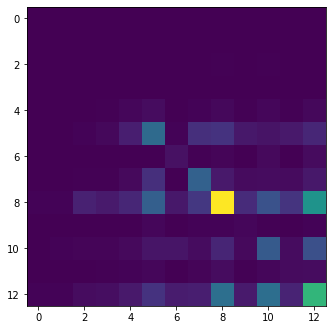

In [ ]:
# plt.figsize(100,100)
plt.rcParams["figure.figsize"] = (8,5.5)
plt.imshow(cm, interpolation='nearest')

In [ ]:
pred

array(['neutral', 'neutral', 'worry', ..., 'neutral', 'neutral',
       'sadness'], dtype=object)

In [ ]:
len(pred)

12000

In [ ]:
y_test

32823    neutral
16298      empty
28505       love
6689     neutral
26893    sadness
          ...   
3779     sadness
11973       love
35668    neutral
483        worry
1380     sadness
Name: sentiment, Length: 12000, dtype: object

In [ ]:
yarr=[x for x in y_test]

In [ ]:
yarr

['neutral',
 'empty',
 'love',
 'neutral',
 'sadness',
 'happiness',
 'worry',
 'happiness',
 'sadness',
 'relief',
 'sadness',
 'neutral',
 'sadness',
 'worry',
 'relief',
 'worry',
 'hate',
 'neutral',
 'worry',
 'love',
 'empty',
 'neutral',
 'worry',
 'sadness',
 'worry',
 'surprise',
 'neutral',
 'worry',
 'neutral',
 'worry',
 'worry',
 'neutral',
 'relief',
 'fun',
 'happiness',
 'worry',
 'neutral',
 'hate',
 'worry',
 'neutral',
 'worry',
 'worry',
 'sadness',
 'worry',
 'worry',
 'neutral',
 'sadness',
 'love',
 'neutral',
 'sadness',
 'neutral',
 'hate',
 'neutral',
 'neutral',
 'worry',
 'neutral',
 'fun',
 'relief',
 'happiness',
 'fun',
 'love',
 'neutral',
 'worry',
 'love',
 'neutral',
 'happiness',
 'worry',
 'sadness',
 'worry',
 'happiness',
 'neutral',
 'neutral',
 'happiness',
 'love',
 'happiness',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'worry',
 'neutral',
 'neutral',
 'worry',
 'neutral',
 'surprise',
 'relief',
 'relief',
 'happiness',
 'happiness',


In [ ]:
i=0
j=0
for sen in x_test:
    # print(pred[i],yarr[i])
    if pred[i] != yarr[i]:
        print(sen,"\nPredicted:- ",pred[i]," Actual:- ",yarr[i])
    i=i+1

Streaming output truncated to the last 5000 lines.
random article generator Wikipedia led to: http://bit.ly/EMtcw remember playing before. got past 1st level 
Predicted:-  happiness  Actual:-  worry
nice 
Predicted:-  neutral  Actual:-  happiness
arriving home now.. great time friends today 
Predicted:-  happiness  Actual:-  love
nope difference 5 OMR C class, notice flight number WY's flight LHR? WY-911 
Predicted:-  relief  Actual:-  neutral
need Xanax 
Predicted:-  neutral  Actual:-  worry
Boss Las Vegas 14th A.P.P. Conference.......pfff 
Predicted:-  neutral  Actual:-  hate
best friend away special olympics . said gonna bring . 
Predicted:-  surprise  Actual:-  love
VOTE MILEY CYRUS MTV MOVIE AWARDS CAN'T WORK I'M #FRUSTRADED :@ 
Predicted:-  hate  Actual:-  worry
course, u mind old ppl 
Predicted:-  neutral  Actual:-  happiness
appears found dog.....as posting signs picture, posting &quot;found&quot; signs picture.... 
Predicted:-  neutral  Actual:-  relief
tell-Only blip immune s